# Import your libraries

In [ ]:
import sys
if 'google.colab' in sys.modules:
    print("Running on Google Colab")
    !pip install datasets
    !pip install rich 
else:
    print("Not running on Google Colab")
from rich import print

# Datasets

In [18]:
from datasets import load_dataset

tweet_eval_emotion = load_dataset("tweet_eval", "emotion")

print(tweet_eval_emotion)

print(tweet_eval_emotion["train"][0])


print( tweet_eval_emotion["train"].features)



Found cached dataset tweet_eval (/home/null/.cache/huggingface/datasets/tweet_eval/emotion/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)
100%|██████████| 3/3 [00:00<00:00, 552.34it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3257
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1421
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 374
    })
})
{'text': "“Worry is a down payment on a problem you may never have'. \xa0Joyce Meyer.  #motivation #leadership #worry", 'label': 2}
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['anger', 'joy', 'optimism', 'sadness'], id=None)}


# How to to classify images using TensorFlow Keras
1.  Download a Cifar 10 Dataset from [here](https://www.cs.toronto.edu/~kriz/cifar.html)
2. Create Multi-Layer Perceptron (MLP) model using Tensorflow Keras
3. Train the MLP model using the Cifar 10 Dataset 

In [ ]:
# TensorFlow example
import tensorflow as tf
cifar_10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) =  cifar_10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape= (32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

# Use PyTorch to Classify the Same Dataset which is Cifar10
1. Download the same Cifar 10 Dataset from [here](https://www.cs.toronto.edu/~kriz/cifar.html)
2. Create a Convoluted Neural Network (CNN) model using PyTorch
3. Train the CNN model using the Cifar 10 Dataset
    3.1 Set the Optimizer to SGD
    3.2 Set the Loss Function to Cross Entropy Loss

In [ ]:
# PyTorch example
import torch
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.flatten(),
            nn.Linear(32*32*3, 128),
            nn.Relu(),
            nn.Linear(128, 10),
        )
    def forward(self, x):
        return self.model(x)


net = Net()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Train the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( net.parameters() , lr=0.001, momentum=0.9)

# Train the model
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data


        # ===================forward=====================
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # ===================backward====================
        # zero the gradients before running the backaward pass
        optimizer.zero_grad()
        
        #Backward pass to compte teh gradients of loow.wrt our learable param
        loss.backward()
        
        # Update the Pararameters
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            ## Get the accuracy of the model     
            running_loss = 0.0

print('Finished Training')

# Scikit Learn on the Iris Dataset
1. Download the Iris Dataset
- Iris dataset: classic ML benchmark for classifying iris species based on sepal/petal measurements
- 150 observations of 3 iris species (50 each)
- Goal is to train a machine learning model to accurately predict the species of an iris flower based on sepal and petal measurements
2. Split the dataset into training and testing sets where 80% of the data is used for training and 20% for testing
3. Train a Decision Tree Classifier on the training set
4. Evaluate the model on the testing set and display the confusion matrix



In [ ]:
# Scikit-learn example
from rich import print
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = datasets.load_iris()
print(iris.feature_names)
X = iris.data
print(iris.target_names)
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## The size of the training and test sets
print(X_train.shape)
print(X_test.shape)

# Train the model
dtc = DecisionTreeClassifier( max_depth=2)
dtc.fit(X_train, y_train)


predictions = dtc.predict(X_test)

# Evaluate the model
score = dtc.score(X_test, y_test)
print(score)

cm = confusion_matrix(y_test, predictions, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=dtc.classes_)
disp.plot()

# Numpy
- Module to provide support for arrays, which don’t exist in base Python
- Used by nearly every other module in Python

In [ ]:
import numpy as np

my_array = np.array([1, 2, 3, 4, 5] , dtype = np.int8)
print(f"Number of dimensions: {my_array.ndim}")
print(f"Shape of array: {my_array.shape}")
print(f"Arary DataType: {my_array.dtype}")

my_2d_array = np.array([[1, 2, 3], [4, 5, 6]] , dtype = np.int8)
print(f"Number of dimensions: {my_2d_array.ndim}")
print(f"Shape of array: {my_2d_array.shape}")
print(f"Arary DataType: {my_2d_array.dtype}")

# Matplotlib
1. Mathplotlib is a plotting library for the Python programming language on the Cifar 10 Dataset

In [ ]:
# Matplotlib example
import matplotlib.pyplot as plt

# Create a simple line plot
x = [1,2,3,4,5]
y = [1,4,9,16,25]
plt.plot(x,y)
plt.show()

# Create a scatter plot
x = [1,2,3,4,5]
y = [1,4,9,16,25]
plt.scatter(x,y)
plt.show()

# Create a bar chart
x = [1,2,3,4,5]
y = [1,4,9,16,25]
plt.bar(x,y)
plt.show()
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Seaborn
Seaborn: a data visualization library built on top of Matplotlib, providing a high-level interface for creating aesthetically pleasing and informative visualizations

fig size: 100.0 DPI, size in inches [6.4 4.8]
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9


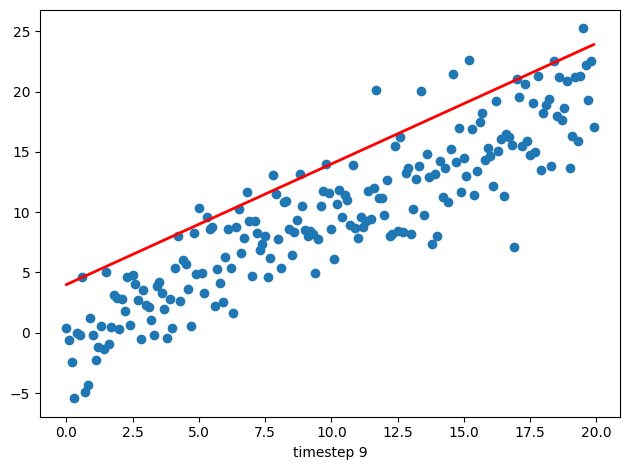

In [2]:
import sys
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
try:
    anim.save('line.gif', dpi=80, writer='imagemagick')
except TypeError as e:
    print(e)
    print('Try installing imagemagick with:')
    print('  conda install -c conda-forge imagemagick')
    print('or')
    print('  pip install imagemagick')
# plt.show() will just loop the animation forever.
plt.show()

# Pandas

In [ ]:
# Pandas example
import pandas as pd

# Create a DataFrame
data = {'Name':['John', 'Anna', 'Peter', 'Linda'],
        'Location':['New York', 'Paris', 'Berlin', 'London'],
        'Age':[24, 13, 53, 33]
       }

df = pd.DataFrame(data)
print("The DataFrame is:")
print(df)

# Select a column
print("The element in the column 'Name' is:")
print(df['Name'])

# Select multiple columns
print("The element in the columns 'Name' and 'Location' is:")
print(df[['Name', 'Location']])

# Select rows by index
print("The element in the first row is:")
print(df.loc[0])

# Select rows by condition
print("The element in the rows where 'Age' is greater than 30 is:")
print(df[df['Age'] > 30])

# A SQR query on the pandas DataFrame
print("The element in the rows where 'Age' is greater than 30 is:")
print(df.query('Age > 30'))

# SciPy
1. Optimization 

In [ ]:
# SciPy example
import scipy.optimize as opt
import seaborn as sns

# Define the function to be minimized
def f(x):
    return x**2 + 10*np.sin(x)
## Create a seaborn plot of the function abov
sns.lineplot(x=np.arange(-10,10,0.1), y=f(np.arange(-10,10,0.1)))


# Call the optimize function
result = opt.minimize(f, x0=0)

# Print the results
print(result)

# Rich 

In [ ]:
# Rich example
from rich.console import Console
from rich.table import Table

# Create a table
table = Table(title="Machine Learning Libraries")
table.add_column("Name", justify="center", style="cyan")
table.add_column("Description", justify="center")

# Add rows to the table
table.add_row("TensorFlow", "Dataflow and differentiable programming")
table.add_row("Scikit-learn", "Classification, regression and clustering algorithms")
table.add_row("PyTorch", "Computer vision and natural language processing")
table.add_row("Numpy", "High-performance multidimensional array object")
table.add_row("Matplotlib", "Plotting library for Python")
table.add_row("Pandas", "Data structures and data analysis tools")
table.add_row("SciPy", "Algorithms and mathematical tools")
table.add_row("Rich", "Building command-line applications")

# Print the table
console = Console()
console.print(table)

# XGBoost
1. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is tabular dataset better than Deep Neural Network (DNN)

In [ ]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

# Gluon
- MultiModalPredictor.load() used pickle module implicitly, which is known to be insecure. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling. Never load data that could have come from an untrusted source, or that could have been tampered with. Only load data you trust.

In [ ]:
%matplotlib inline

import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
np.random.seed(123)

from autogluon.core.utils.loaders import load_pd
train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/train.parquet')
test_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/dev.parquet')
subsample_size = 1000  # subsample data for faster demo, try setting this to larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head(10)
# ====================== Text Classification with with MultoModalPredictor ======================
from autogluon.multimodal import MultiModalPredictor
import uuid
model_path = f"./tmp/{uuid.uuid4().hex}-automm_sst"
predictor = MultiModalPredictor(label='label', eval_metric='acc', path=model_path)
predictor.fit(train_data, time_limit=180)
# ====================== Evaluate the predictor ======================
test_score = predictor.evaluate(test_data)
print(test_score)
test_score = predictor.evaluate(test_data, metrics=['acc', 'f1'])
print(test_score)
sentence1 = "it's a charming and often affecting journey."
sentence2 = "It's slow, very, very, very slow."
predictions = predictor.predict({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Sentiment":', predictions[0])
print('"Sentence":', sentence2, '"Predicted Sentiment":', predictions[1])

# Auto ML Libraries

## Optuna

In [26]:
import optuna
import seaborn as sns
# Define the function to be minimized
def f(x):
    return x**2 + 10*np.sin(x)
## Create a seaborn plot of the function abov
def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return f(x)

study = optuna.create_study( direction = "minimize" )
study.optimize(objective, n_trials = 10 ) 

list_of_element = []
for x in study.trials:
    list_of_element.append( x.params["x"]  ) 

print( study.best_params ) # E.g. {'x': 2.002108042} 



sns.lineplot(x=np.arange(-10,10,0.1), y=f(np.arange(-10,10,0.1)))
## add the points in the lines
for index  , x in enumerate ( list_of_element ) :
    ## add the number in the problem 
    #plt.text(x, f(x), str(x), fontsize=10)
    print( index ) 
    plt.text(x, f(x), str( index + 1), fontsize=10)
    plt.scatter(x, f(x) , color='red' , s= 100)

[I 2023-02-06 10:39:33,509] A new study created in memory with name: no-name-58fae3d4-c4c3-40f0-b412-94e752bf218d


TypeError: optimize() got an unexpected keyword argument 'objective'

# Timm


In [5]:
from urllib.request import urlopen
from PIL import Image
import timm
import torch
import requests
from PIL import Image
from io import BytesIO
url = 'https://datasets-server.huggingface.co/assets/imagenet-1k/--/default/test/12/image/image.jpg'
image = Image.open(requests.get(url, stream=True).raw)
model = timm.create_model('mobilenetv3_large_100', pretrained=True).eval()
transform = timm.data.create_transform(
    **timm.data.resolve_data_config( model.pretrained_cfg ))
# == We can preapre this image for the model by passing it through the transform ==
image_tensor = transform(image)
print( image_tensor.shape ) 
# == Now we can pass that image ot th emodel to get the predictsions. We use unsqueeze to add a batch dimension ==
output = model(image_tensor.unsqueeze(0))
print( output.shape )
## === We can use softmax to get the probabilities for each class and this leaves us with a tensor of shape ( num_classes, ) ==
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print( probabilities.shape ) 
# == We can use the torch.topk function to get the top 5 predictions ==
values, indices = torch.topk(probabilities, 5)
print( indices)
# == We can use the timm.utils.decode_predictions function to get the class names for the top 5 predictions ==


torch.Size([3, 224, 224])
torch.Size([1, 1000])
torch.Size([1000])
tensor([162, 166, 161, 164, 167])


In [10]:
IMAGENET_1k_URL = 'https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt'
IMAGENET_1k_LABELS = requests.get(IMAGENET_1k_URL).text.strip().split('\n')
[{'label': IMAGENET_1k_LABELS[idx], 'value': val.item()} for val, idx in zip(values, indices)]

[{'label': 'beagle', 'value': 0.8444967269897461},
 {'label': 'Walker_hound, Walker_foxhound', 'value': 0.03877762705087662},
 {'label': 'basset, basset_hound', 'value': 0.025460997596383095},
 {'label': 'bluetick', 'value': 0.01014547236263752},
 {'label': 'English_foxhound', 'value': 0.0071521932259202}]

# Hugging Face Libraries 

## Zero Shot Classification Text Classification on 14 different Languages
- XNLI is a subset of a few thousand examples from MNLI which has been translated into a 100 different languages (some low-ish resource). As with MNLI, the goal is to predict textual entailment (does sentence A imply/contradict/neither sentence B) and is a classification task (given two sentences, predict one of three labels).[1]

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")

sequence_to_classify = "Angela Merkel ist eine Politikerin in Deutschland und Vorsitzende der CDU"
candidate_labels = ["politics", "economy", "entertainment", "environment"]
output = classifier(sequence_to_classify, candidate_labels, multi_label=False)
print(output)


## Summarization

In [ ]:
SUMMARY_TEXT_SAMPLE = "The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct."
# use bart in pytorch
from transformers import pipeline
'''
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
'''
default_hg_summarizer = pipeline("summarization")
print( default_hg_summarizer(SUMMARY_TEXT_SAMPLE) ) 

## Fine Tune a small BERT on Tweet Eval emotion Subset dataset

In [ ]:
from datasets import load_dataset


dataset = load_dataset("tweet_eval", "emotion")
print(dataset["train"][0])
print(dataset)

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("neuralmagic/oBERT-3-upstream-pretrained-dense" )

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_dataset = dataset.map(preprocess_function, batched=True)

model = AutoModelForSequenceClassification.from_pretrained("neuralmagic/oBERT-3-upstream-pretrained-dense" , num_labels = 4)

## Calling the training arguments 
from transformers import TrainingArguments , Trainer
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset = tokenized_dataset["train"],
    tokenizer=tokenizer,
)
trainer.train()

    
